---
title: "DNN From Scratch: The nuts and bolts"
description: |
  Achieving 83% accuracy on the Titanic Kaggle competition dataset with a DNN built from scratch.
author:
  - name: Jake Gehri
    url: {}
date: "2022-11-01"
categories: ["Python", "Deep Learning", "PyTorch"]
image: DNN_From_Scratch.jpeg
format: 
  html:
    df-print: paged
    toc: true
engine: knitr
---

In [140]:
import torch
import pandas as pd
import numpy as np
import torch.nn.functional as F
from fastai import *
from fastbook import *

In [42]:
data = pd.read_csv('train.csv')

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
modes = data.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [46]:
data.fillna(modes, inplace=True)

In [47]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
data.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


<AxesSubplot:>

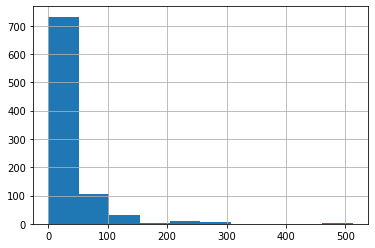

In [50]:
data['Fare'].hist()

In [51]:
data['LogFare'] = np.log(data['Fare'] + 1)

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2.202765


In [53]:
data = pd.get_dummies(data, columns = ['Pclass', 'Sex', 'Embarked'])

In [54]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,0,1,0,1,0,0,1


In [55]:
dep_var = ['Survived']

In [56]:
indep_vars = ['Age', 'SibSp', 'Parch', 'LogFare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [57]:
len(indep_vars)

12

In [128]:
y = torch.tensor(data[dep_var].values, dtype=torch.float)

In [129]:
X = torch.tensor(data[indep_vars].values, dtype=torch.float)

In [130]:
vals, indicies = X.max(dim=0)

In [131]:
X = X / vals

In [141]:
trn_split, val_split = RandomSplitter(seed=42)(X)

In [142]:
len(trn_split), len(val_split)

(713, 178)

In [184]:
X_train, y_train = X[trn_split], y[trn_split]
X_val, y_val = X[val_split], y[val_split]

In [145]:
nips = X_train.shape[1]

In [466]:
torch.manual_seed(42)

def get_coeffs(nips = nips, l1_size = 20, n_classes = 1):
    layer1 = (torch.rand(nips, l1_size)-0.5) / nips
    layer2 = (torch.rand(l1_size, n_classes)-0.5)
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [467]:
def forward_pass(coeffs, X_train):
    l1, l2, const = coeffs
    acts = F.relu(X_train@l1)
    acts = acts@l2 + const
    return torch.sigmoid(acts)

In [468]:
def calc_loss(acts, y_train): return torch.abs(acts - y_train).mean()

In [469]:
def backprop(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [470]:
def one_epoch(coeffs, lr):
    acts = forward_pass(coeffs, X_train)
    loss = calc_loss(acts, y_train)
    loss.backward()
    with torch.no_grad(): backprop(coeffs, lr)
    print(f"{loss:.3f}", end = "; ")

In [ ]:
def acc(coeffs): return (y_val.bool()==(forward_pass(coeffs, X_val)>0.5)).float().mean()

In [487]:
def train_model(epochs=50, lr=2):
    torch.manual_seed(42)
    coeffs = get_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr)
    return coeffs, acc(coeffs)
    

In [490]:
_, acc = train_model()

0.548; 0.529; 0.503; 0.466; 0.408; 0.357; 0.330; 0.313; 0.298; 0.286; 0.277; 0.269; 0.261; 0.255; 0.249; 0.244; 0.239; 0.235; 0.231; 0.229; 0.226; 0.224; 0.222; 0.220; 0.219; 0.217; 0.216; 0.215; 0.214; 0.213; 0.212; 0.211; 0.211; 0.210; 0.209; 0.209; 0.208; 0.207; 0.207; 0.206; 0.206; 0.205; 0.205; 0.204; 0.204; 0.204; 0.203; 0.203; 0.203; 0.202; 

In [491]:
acc

tensor(0.8258)